# GB Model – Sampling Comparison

In [1]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from models.train_gb import run
from models.utils import load_dataframe, split_features


In [2]:

MODEL = 'gb'
SAMPLINGS = ['none', 'under', 'smote']


In [3]:

results = {}
for samp in SAMPLINGS:
    print('Running sampling:', samp)
    results[samp] = run(samp)


Running sampling: none
Best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300}
[GradientBoosting[none]] precision=0.1111 recall=0.0952 auc=0.5008
Confusion Matrix:
 [[2203   16]
 [  19    2]]
Running sampling: under
Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 300}
[GradientBoosting[under]] precision=0.0105 recall=0.5714 auc=0.4925
Confusion Matrix:
 [[1089 1130]
 [   9   12]]
Running sampling: smote
Best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 300}
[GradientBoosting[smote]] precision=0.3333 recall=0.0952 auc=0.4761
Confusion Matrix:
 [[2215    4]
 [  19    2]]


In [4]:

metrics_df = pd.DataFrame(
    [{'sampling': samp, **metrics} for samp, metrics in results.items()]
)
metrics_df[['sampling', 'precision', 'recall', 'roc_auc']]


,sampling,precision,recall,roc_auc
0,none,0.111111,0.095238,0.500848
1,under,0.010508,0.571429,0.492532
2,smote,0.333333,0.095238,0.476083


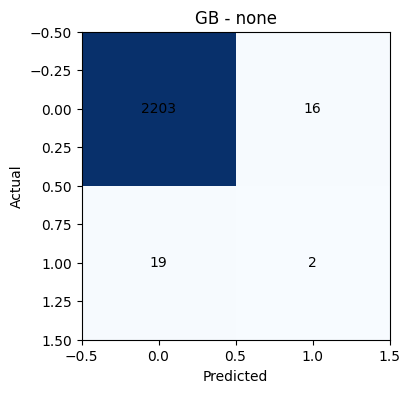

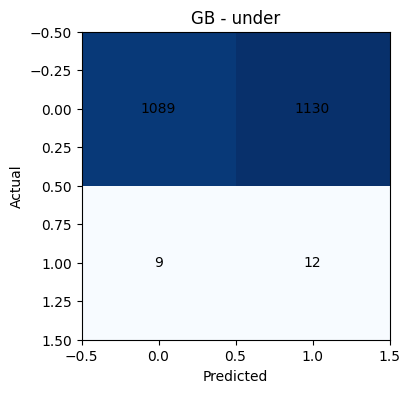

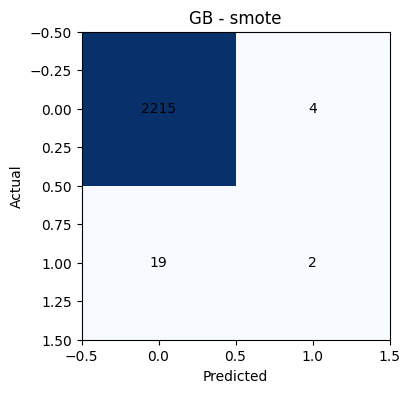

In [5]:

for samp, metrics in results.items():
    cm = metrics['confusion_matrix']
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{MODEL.upper()} - {samp}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()
